In [2]:
#import related libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)
sns.set(context='notebook', style='whitegrid', rc={"figure.figsize": (18,4)})
#visualization setting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,4
# to get rid of the unnecessary statsmodels package warnings
import warnings
warnings.filterwarnings("ignore")
# setting random seed for notebook reproducability
rnd_seed=42
np.random.seed=rnd_seed
np.random.set_state=rnd_seed
#import ARIMA library
from pmdarima import auto_arima

In [3]:

df = pd.read_csv("SNP500Dataset.csv")
df = df.drop(columns=['Unnamed: 0'])  

df.sort_values(by='Date', ascending=False)

df['Date'] = pd.to_datetime(df['Date'])
df.set_index(keys=['Date'], drop=True, inplace=True)

for i in df.columns:
    df[i] = df[i].apply(lambda x : x if x > 0 else 0.01)

,Date,SNP500_High,SNP500_Low,Bitcoin_High,Bitcoin_Low,Oil_High,Oil_Low,Gold_High,Gold_Low,EURO_To_USD_Rate,Interest
0,2022-11-25,4034.02,4020.76,16481.4,16060.8,79.89,76.23,1761.2,1745.9,1.0402,1.41
1,2022-11-23,4033.78,3998.66,16595.4,16414.6,81.95,76.83,1754.9,1719.0,1.0418,1.41
2,2022-11-22,4005.88,3956.88,16686.3,16387.9,82.36,79.86,1751.0,1737.6,1.0310,1.41
3,2022-11-21,3962.00,3933.34,16611.8,16360.9,80.30,75.08,1755.0,1733.9,1.0245,1.41
4,2022-11-18,3979.89,3935.98,16785.6,16472.0,82.64,77.24,1769.9,1749.2,1.0324,1.41
...,...,...,...,...,...,...,...,...,...,...,...
1985,2015-01-08,2064.08,2030.61,2757.3,2623.2,49.65,47.73,1216.4,1206.9,1.1793,0.13
1986,2015-01-07,2029.61,2005.55,2804.4,2624.4,49.31,46.83,1217.5,1210.0,1.1839,0.13
1987,2015-01-06,2030.25,1992.44,2800.5,2614.0,50.37,47.55,1222.0,1206.0,1.1889,0.13
1988,2015-01-05,2054.44,2017.34,2617.8,2518.8,52.73,49.68,1205.2,1189.1,1.1934,0.13


In [4]:
df

,SNP500_High,SNP500_Low,Bitcoin_High,Bitcoin_Low,Oil_High,Oil_Low,Gold_High,Gold_Low,EURO_To_USD_Rate,Interest
Date,,,,,,,,,,
2022-11-25,4034.02,4020.76,16481.4,16060.8,79.89,76.23,1761.2,1745.9,1.0402,1.41
2022-11-23,4033.78,3998.66,16595.4,16414.6,81.95,76.83,1754.9,1719.0,1.0418,1.41
2022-11-22,4005.88,3956.88,16686.3,16387.9,82.36,79.86,1751.0,1737.6,1.0310,1.41
2022-11-21,3962.00,3933.34,16611.8,16360.9,80.30,75.08,1755.0,1733.9,1.0245,1.41
2022-11-18,3979.89,3935.98,16785.6,16472.0,82.64,77.24,1769.9,1749.2,1.0324,1.41
...,...,...,...,...,...,...,...,...,...,...
2015-01-08,2064.08,2030.61,2757.3,2623.2,49.65,47.73,1216.4,1206.9,1.1793,0.13
2015-01-07,2029.61,2005.55,2804.4,2624.4,49.31,46.83,1217.5,1210.0,1.1839,0.13
2015-01-06,2030.25,1992.44,2800.5,2614.0,50.37,47.55,1222.0,1206.0,1.1889,0.13


In [5]:
#note 
def forecast(timeseries_df, days_forecasted):
    stepwise_model = auto_arima(timeseries_df, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=7,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 
    print("Final Model's AIC=", stepwise_model.aic())
    future_forecast = stepwise_model.fit(timeseries_df).predict(n_periods=days_forecasted)
    future_index = pd.date_range(start=timeseries_df.index[0] + pd.DateOffset(days=2), periods=days_forecasted, freq='MS')
    future_forecast = pd.DataFrame(future_forecast, index=future_index, columns=['Prediction'])
    pd.concat([timeseries_df, future_forecast], axis=1).plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(dataset, _period):
    decomposition = seasonal_decompose(dataset, model='multiplicative', period = _period)
    fig = decomposition.plot()
    fig.set_figwidth(12)
    fig.set_figheight(8)
    fig.suptitle('Decomposition of multiplicative time series')

In [ ]:
"""
Trend, the trend component at time t, which reflects the long-term progression of the series. A trend exists when there is a persistent increasing or decreasing direction in the data.
Cyclic, the cyclical component at time t, which reflects repeated but non-periodic fluctuations. The duration of these fluctuations is usually of at least two years.
Seasonal, the seasonal component at time t, reflecting seasonality (seasonal variation). Seasonality occurs over a fixed and known time period (e.g., the quarter of the year, the month, or day of the week).
Irregularities, the irregular component (“residuals” or "noise") at time t, which describes random, irregular influences.
"""

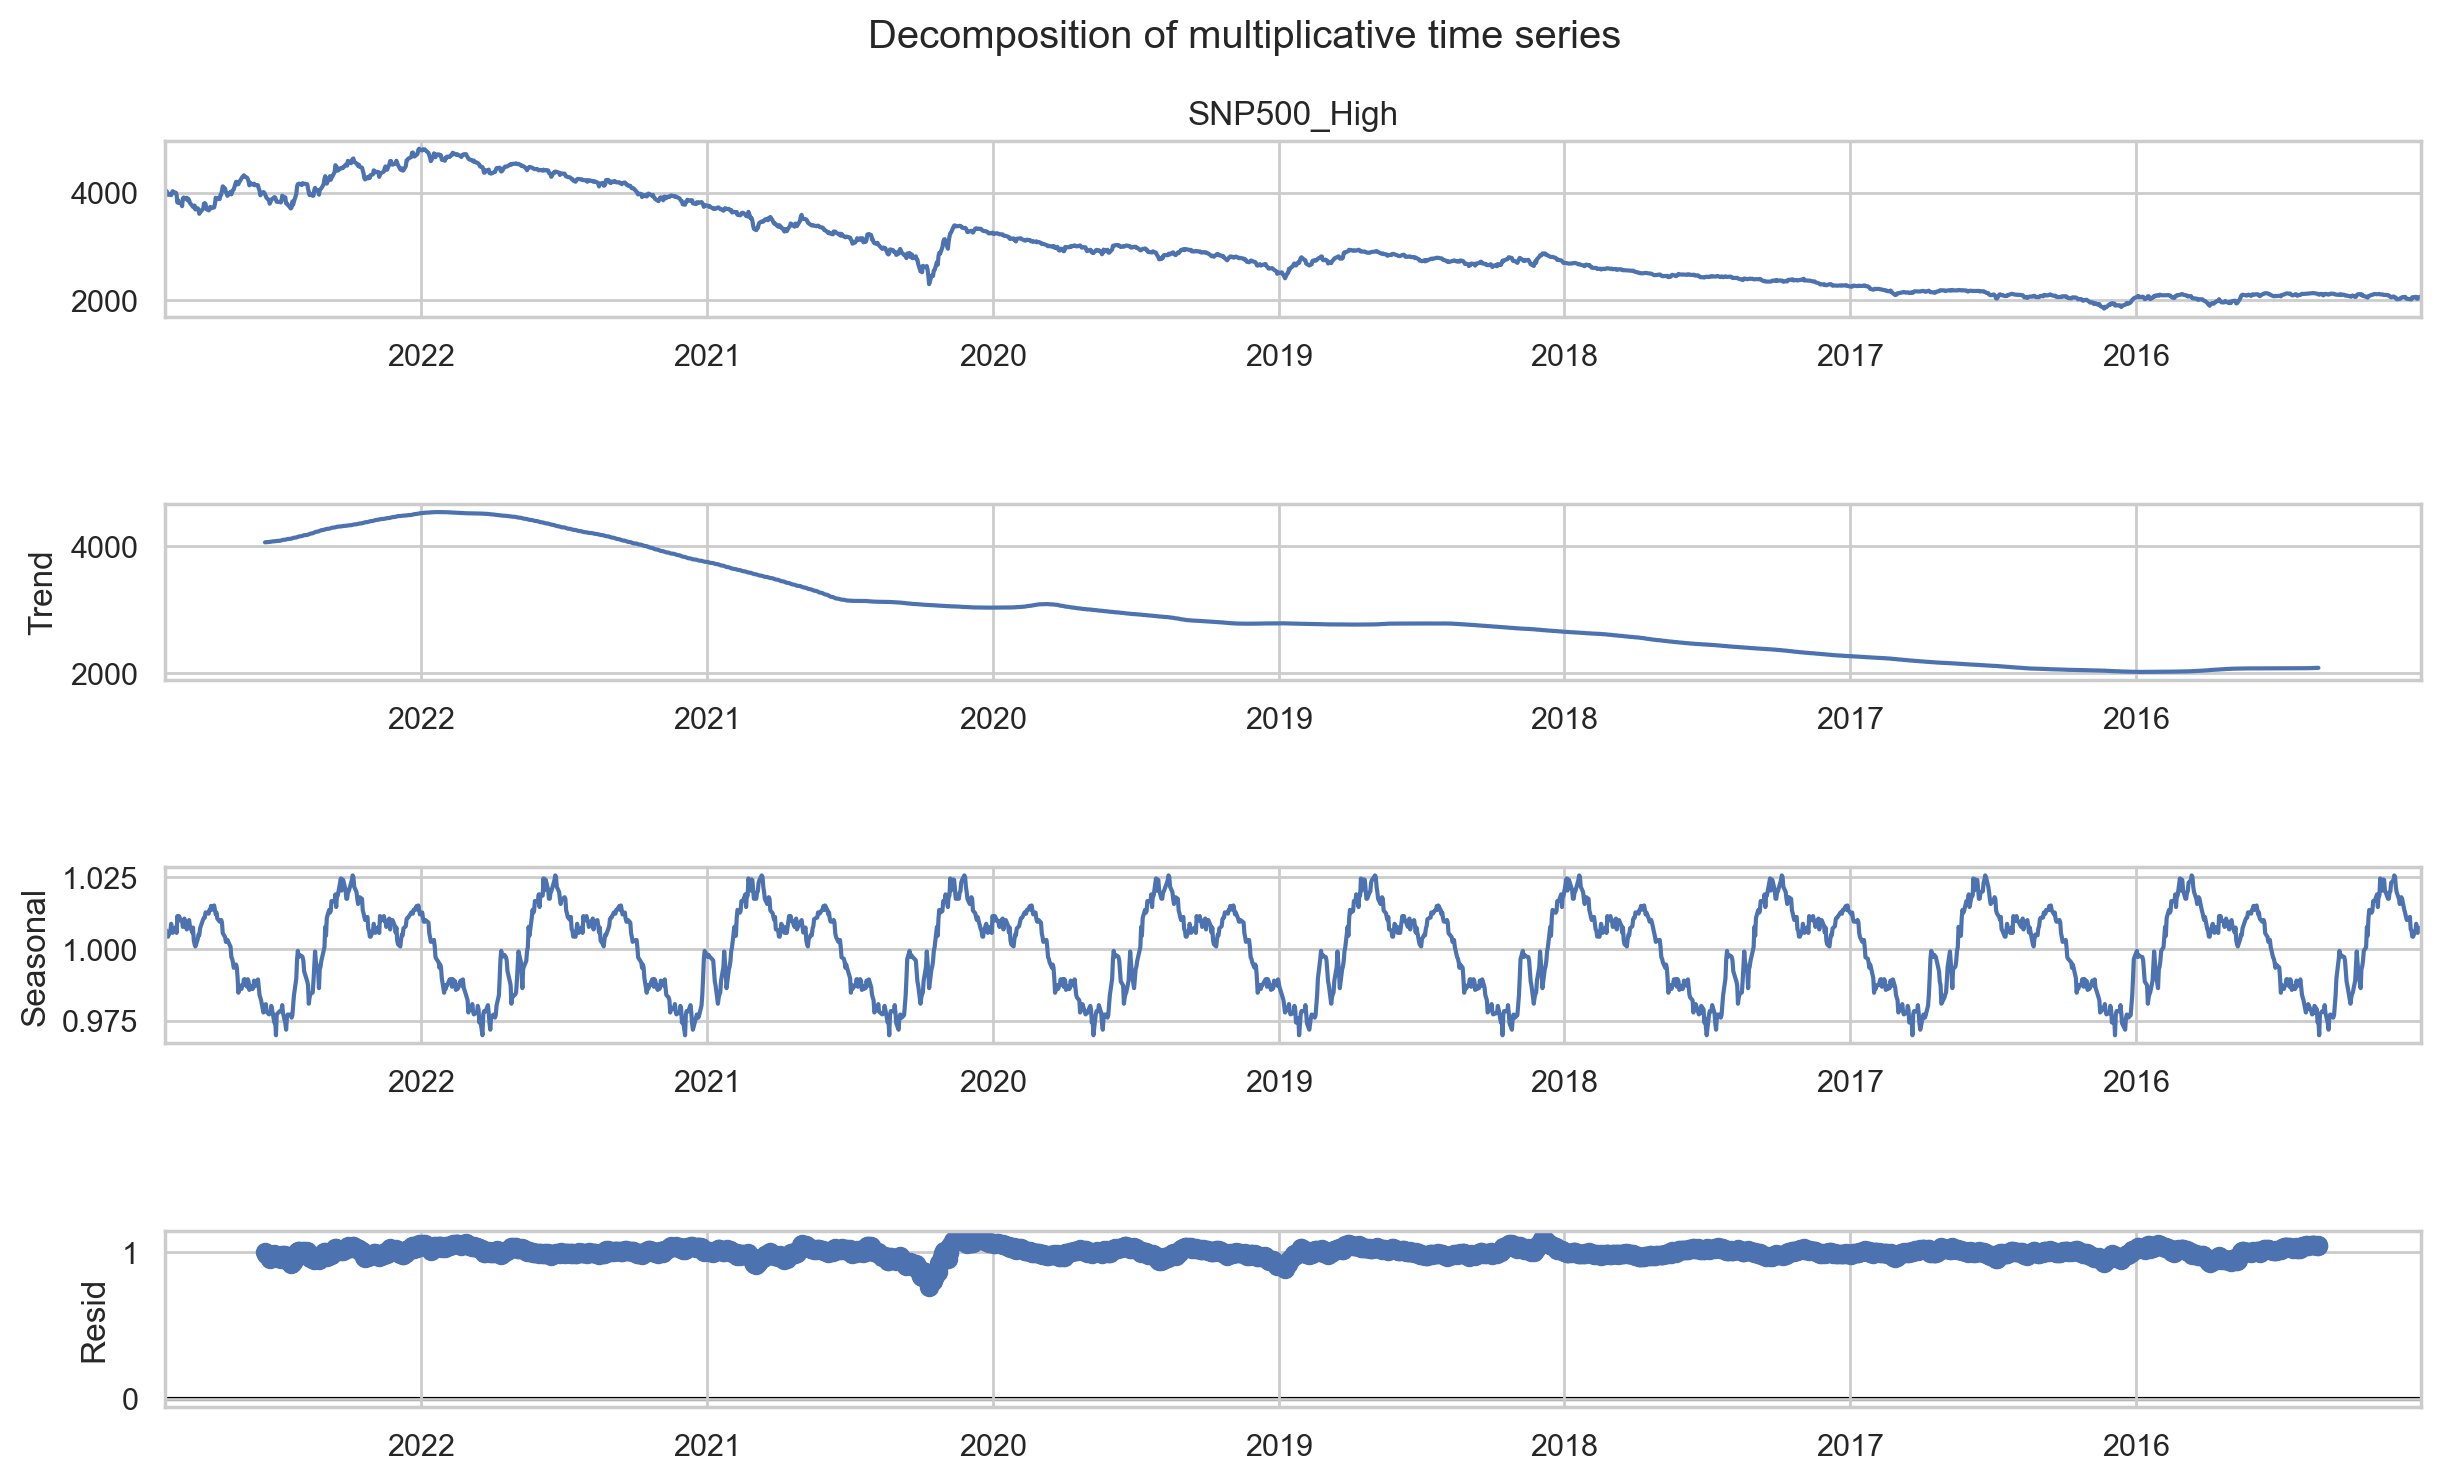

In [14]:
decompose(df['SNP500_High'],180)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=8292.870, Time=0.20 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=7666.812, Time=0.71 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=2.05 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=8221.438, Time=0.40 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=7415.690, Time=1.15 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=3.97 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=1.89 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=7436.853, Time=0.58 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=7417.666, Time=1.50 sec
 ARIMA(1,1,1)(2,1,0)[7]             : AIC=7417.662, Time=2.87 sec
 ARIMA(0,1,1)(2,1,0)[7]             : AIC=7416.096, Time=1.16 sec
 ARIMA(2,1,1)(2,1,0)[7]             : AIC=7419.674, Time=1.41 sec
 ARIMA(1,1,0)(2,1,0)[7] intercept   : AIC=7417.687, Time=3.30 sec

Best model:  ARIMA(1,1,0)(2,1,0)[7]          
Total 

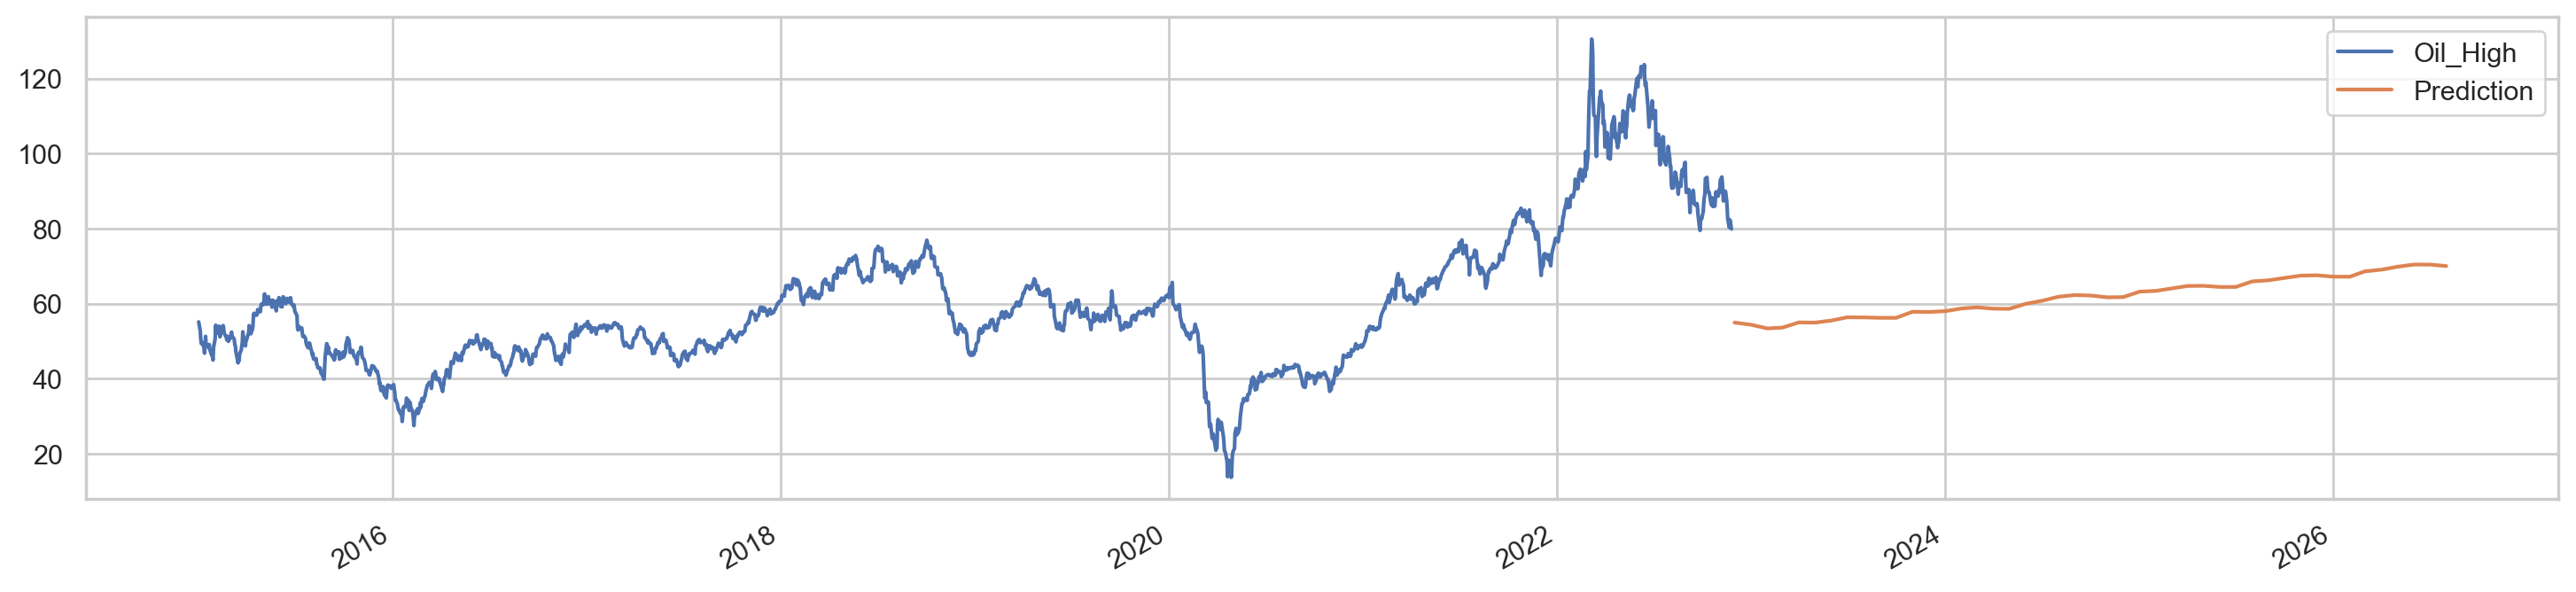

In [15]:
forecast(df['Oil_High'],45)